In [1]:
!kaggle datasets download -d saurabhbadole/breast-cancer-wisconsin-state
!unzip /content/breast-cancer-wisconsin-state.zip

Dataset URL: https://www.kaggle.com/datasets/saurabhbadole/breast-cancer-wisconsin-state
License(s): other
  0% 0.00/5.71k [00:00<?, ?B/s]
100% 5.71k/5.71k [00:00<00:00, 6.76MB/s]
Archive:  /content/breast-cancer-wisconsin-state.zip
  inflating: breast-cancer-wisconsin.data  


In [2]:
import pandas as pd
df = pd.read_csv('/content/breast-cancer-wisconsin.data')
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [3]:
df.columns = ['ID','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin' ,'Normal Nucleoli' ,'Mitoses','Class']
df.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [4]:
df.drop(columns=['ID'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              698 non-null    int64 
 1   Uniformity of Cell Size      698 non-null    int64 
 2   Uniformity of Cell Shape     698 non-null    int64 
 3   Marginal Adhesion            698 non-null    int64 
 4   Single Epithelial Cell Size  698 non-null    int64 
 5   Bare Nuclei                  698 non-null    object
 6   Bland Chromatin              698 non-null    int64 
 7   Normal Nucleoli              698 non-null    int64 
 8   Mitoses                      698 non-null    int64 
 9   Class                        698 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [5]:
for column in df.columns:
    unique_values = df[column].unique()
    num_unique_values = df[column].nunique()
    print(f"Column: {column}")
    print(f"Number of unique values: {num_unique_values}")
    print(f"Unique values: {unique_values}\n")

Column: Clump Thickness
Number of unique values: 10
Unique values: [ 5  3  6  4  8  1  2  7 10  9]

Column: Uniformity of Cell Size
Number of unique values: 10
Unique values: [ 4  1  8 10  2  3  7  5  6  9]

Column: Uniformity of Cell Shape
Number of unique values: 10
Unique values: [ 4  1  8 10  2  3  5  6  7  9]

Column: Marginal Adhesion
Number of unique values: 10
Unique values: [ 5  1  3  8 10  4  6  2  9  7]

Column: Single Epithelial Cell Size
Number of unique values: 10
Unique values: [ 7  2  3  1  6  4  5  8 10  9]

Column: Bare Nuclei
Number of unique values: 11
Unique values: ['10' '2' '4' '1' '3' '9' '7' '?' '5' '8' '6']

Column: Bland Chromatin
Number of unique values: 10
Unique values: [ 3  9  1  2  4  5  7  8  6 10]

Column: Normal Nucleoli
Number of unique values: 10
Unique values: [ 2  1  7  4  5  3 10  6  9  8]

Column: Mitoses
Number of unique values: 9
Unique values: [ 1  5  4  2  3  7 10  8  6]

Column: Class
Number of unique values: 2
Unique values: [2 4]



In [6]:
import numpy as np

In [7]:
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors='coerce')
df['Bare Nuclei'].unique()

array([10.,  2.,  4.,  1.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [8]:
df['Bare Nuclei'].isnull().sum()

16

In [9]:
df['Bare Nuclei'].fillna(df['Bare Nuclei'].mean(), inplace=True)

In [10]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,4.416905,3.137536,3.210602,2.809456,3.217765,3.548387,3.438395,2.869628,1.590258,2.690544
std,2.817673,3.052575,2.972867,2.856606,2.215408,3.603144,2.440056,3.055004,1.716162,0.951596
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [11]:
df.duplicated().sum()

235

In [12]:
df.drop_duplicates(inplace=True)

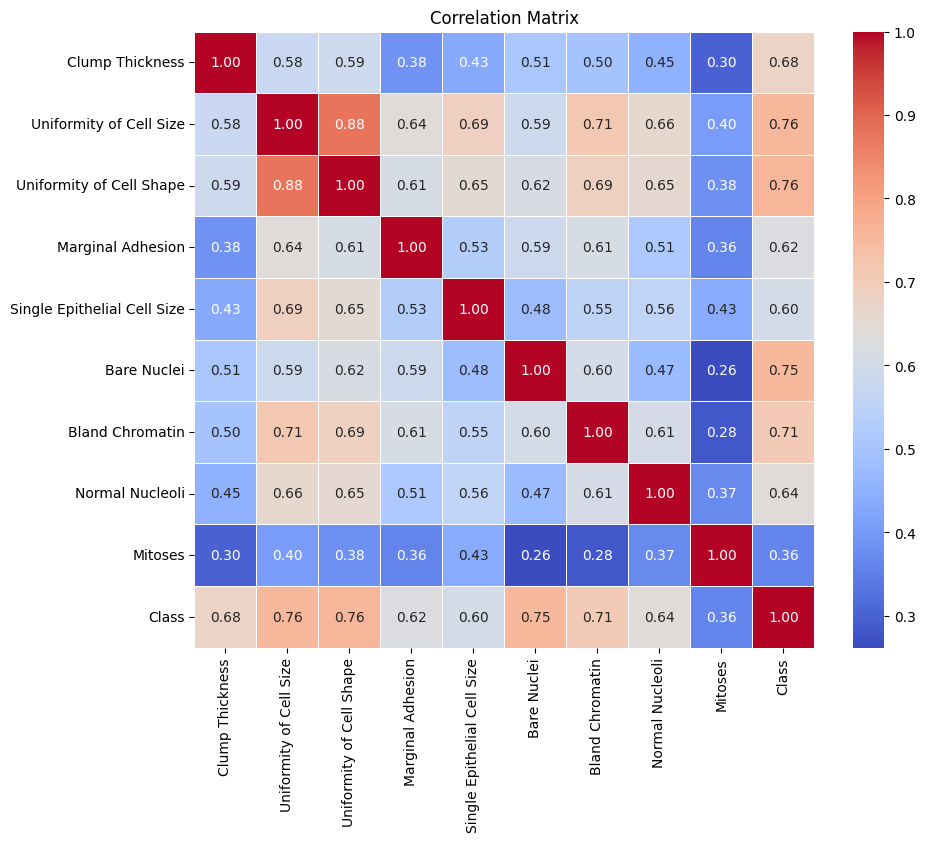

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


<ipython-input-14-0b455b3cbc2e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


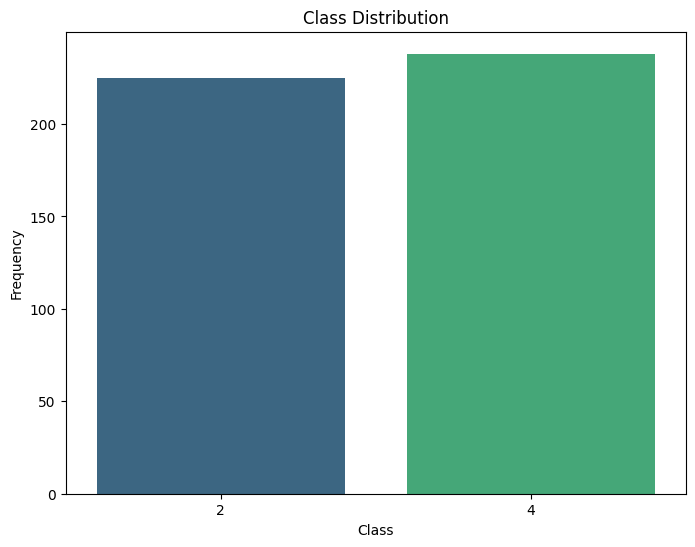

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
class_counts = df['Class'].value_counts()

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_train.shape, X_test.shape

((370, 9), (93, 9))

In [16]:
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [17]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.946236559139785
              precision    recall  f1-score   support

           2       0.96      0.94      0.95        50
           4       0.93      0.95      0.94        43

    accuracy                           0.95        93
   macro avg       0.95      0.95      0.95        93
weighted avg       0.95      0.95      0.95        93



**SVM**

In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Initialize the SVM model with a linear kernel (you can try 'poly', 'rbf', etc.)
svm_model = SVC(kernel='linear', C=1.0, random_state=0)

# Train the model
svm_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9354838709677419
Confusion Matrix:
 [[46  4]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           2       0.96      0.92      0.94        50
           4       0.91      0.95      0.93        43

    accuracy                           0.94        93
   macro avg       0.93      0.94      0.94        93
weighted avg       0.94      0.94      0.94        93

